# The challenge
Earlier in the semester, you worked with restaurant data from the UK. This time, you will be working with data from the US. 
## What you need to do
You need to do the following
1. Load up the data
2. "Eyeball" the data: there is no codebook! Give an explanation of the data set.
3. Develop a hypothesis. 
4. Find literature to support that hypothesis and develop a narrative. 
5. Find the level of correlation between two variables. 
6. Build a regression model using multiple variables. Think carefully about the control variables you use. 
7. Display the results of the regression using stargazer.
8. Explain whether you find for or against the hypothesis (or find for the null). 

## First, a visualisation
Here's a visualisation of the data set to give you an idea of what you are dealing with. The data are collected at the *county level*. I deliberately haven't created a codebook for you, as I wanted to make it difficult! 
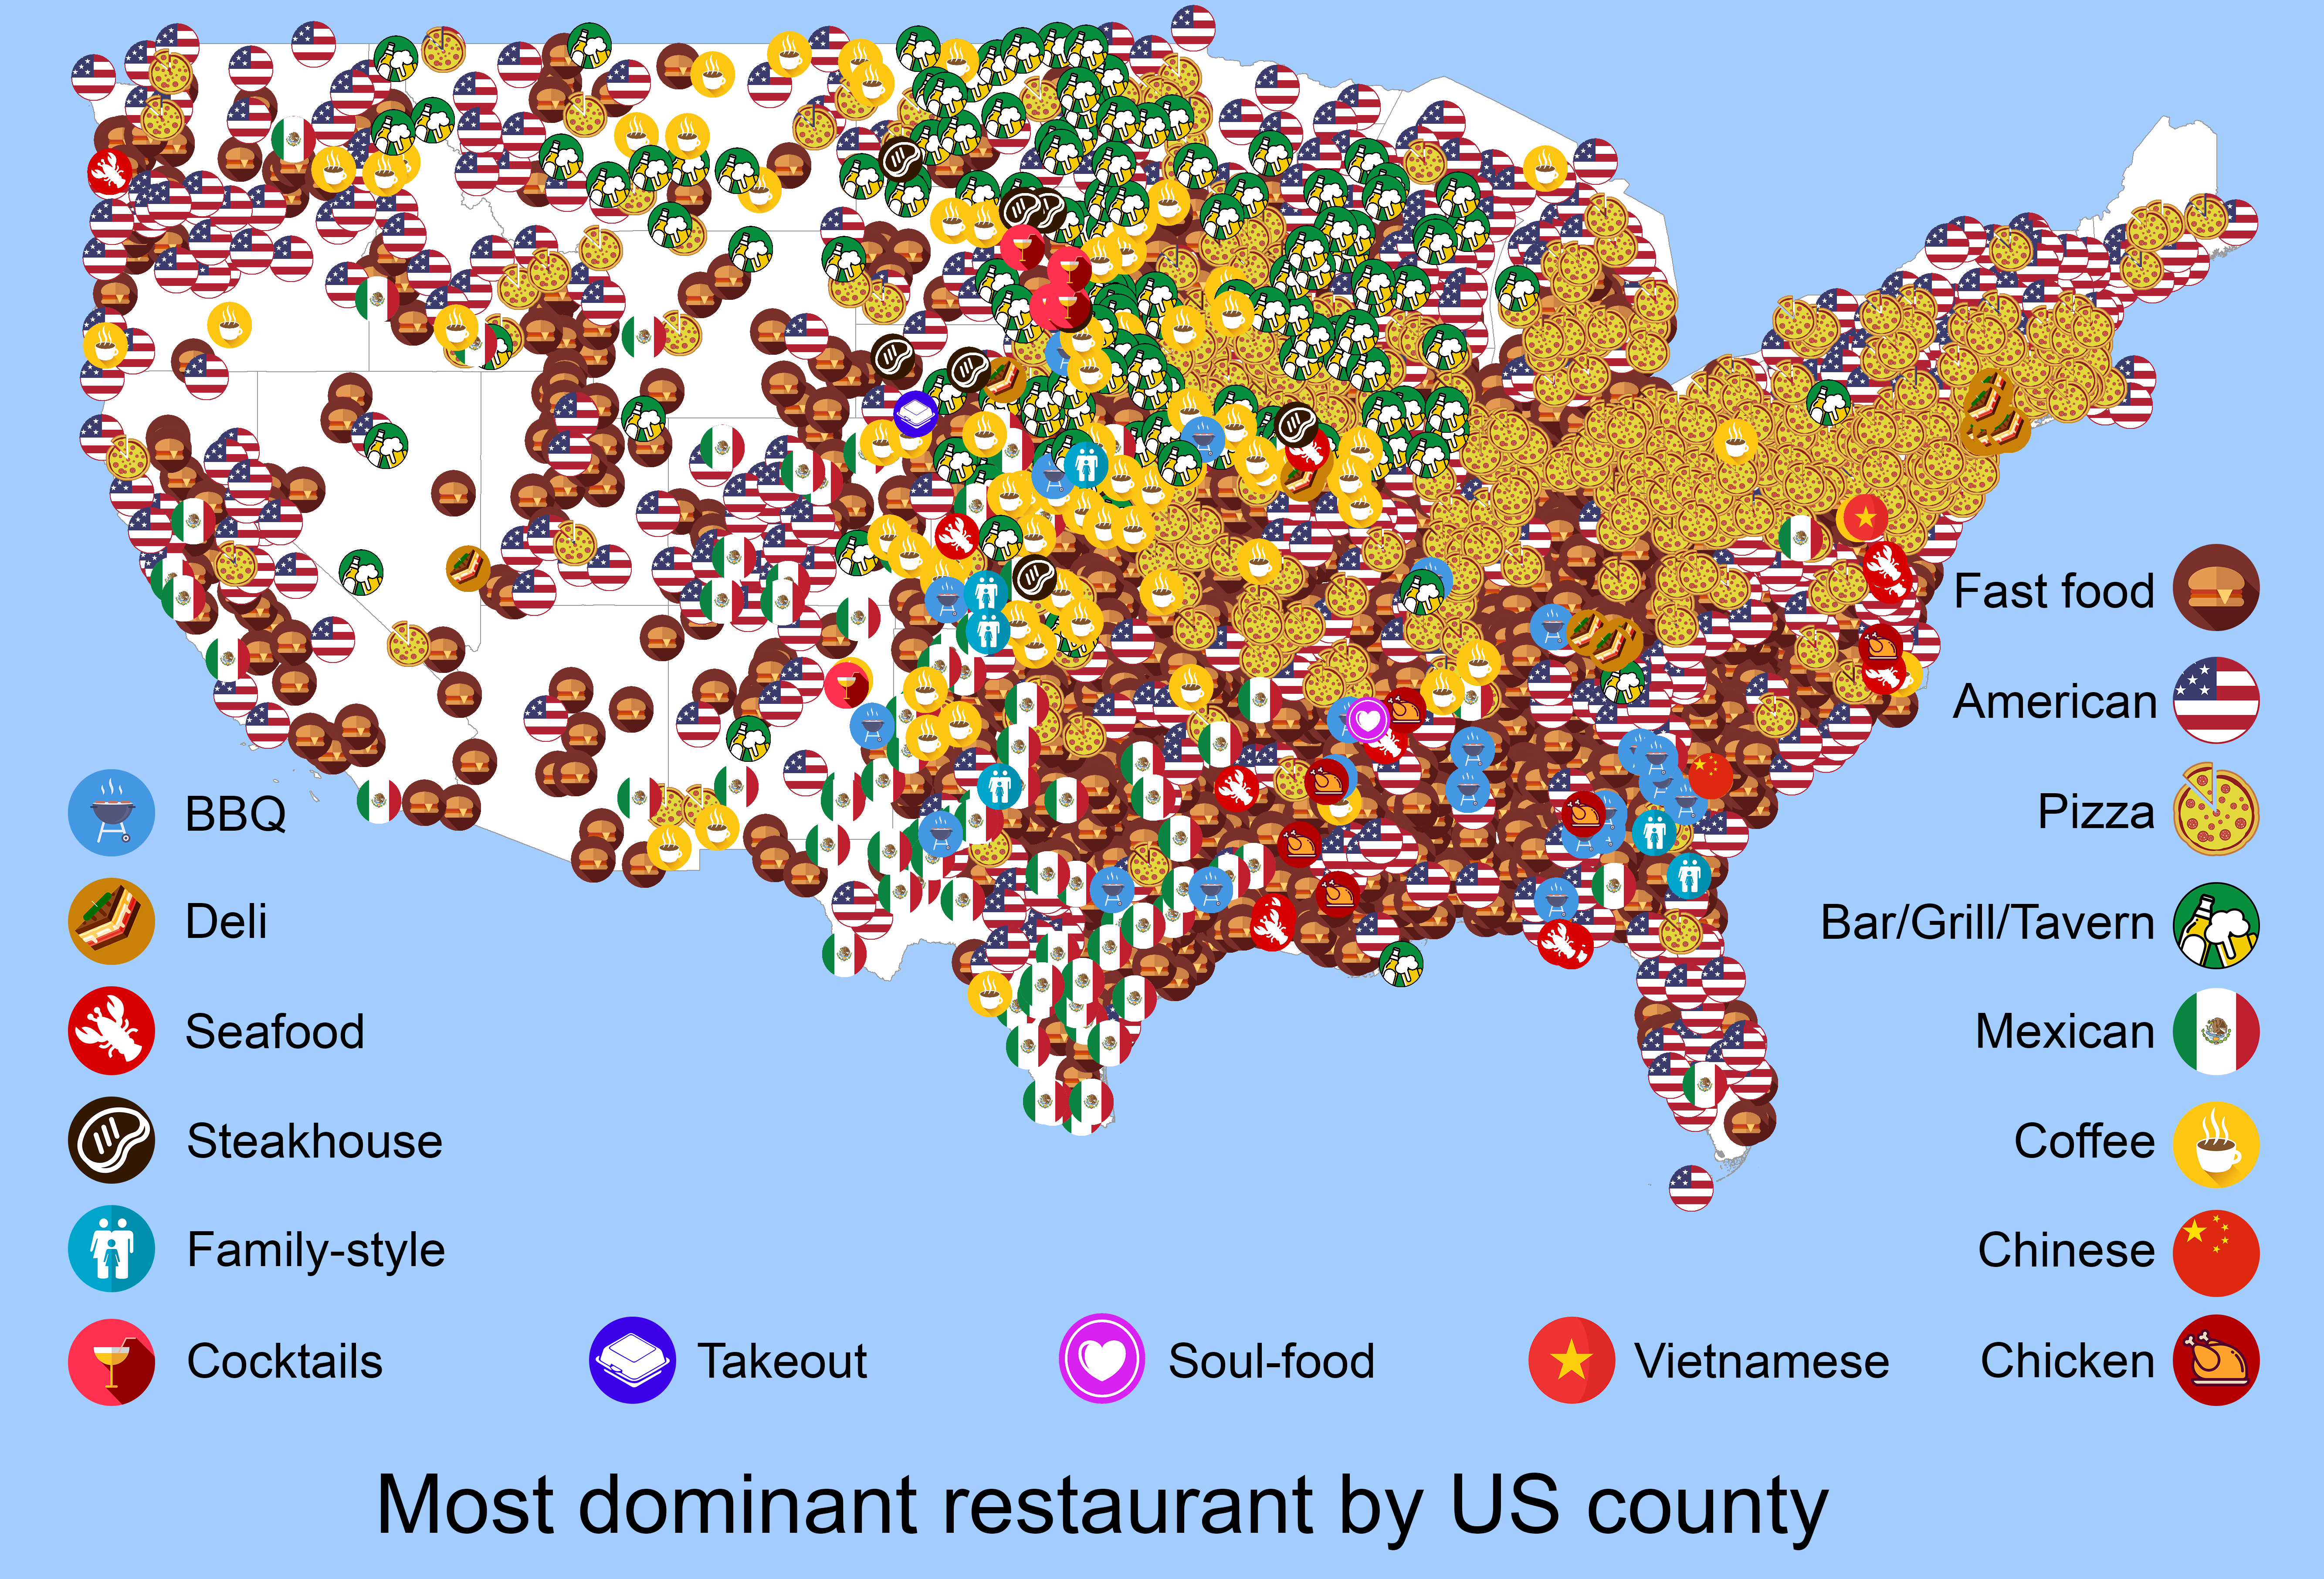

## 1. Load up the data. 
Ok, I'm going to make this bit easy for you. Use the code below. It will do the following: 
1. Load up some libraries that you might need
2. Download the data directly from the Harvard Dataverse, and load it into a data frame called "usa". 

In [8]:
# import libraries.
# we'll abbreviate library names
# to save us typing so much later

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import requests
from io import StringIO

# you may not have stargazer; this will test
# whether you have and install if you haven't

try:
    import stargazer
    print("Stargazer is already installed.")
except ImportError:
    print("Stargazer is not installed. Installing now...")
    !pip install stargazer

from stargazer.stargazer import Stargazer

# load directly from the Harvard Dataverse

file_url = 'https://dataverse.harvard.edu/api/access/datafile/8162845'

response = requests.get(file_url)
response.raise_for_status()

# put it in a data frame called 'usa'

usa = pd.read_csv(StringIO(response.text), sep='\t')

# now check to see if the data have downloaded
# and been passed to the data frame

if usa.empty: 
    print("Data not loaded.")
else: 
    print("Data successfully loaded.")


Stargazer is already installed.
Data successfully loaded.


## 2. "Eyeball" the data: there is no codebook! Give an explanation of the data set.
You have two options here. Either use Python codes to describe the data (how many rows, how many variables, etc.) OR download the data from here: 
https://doi.org/10.7910/DVN/AUUN3W
, load it up in a spreadsheet to do a manual analysis, and give a description of the data below. 

In [9]:
# your description of the data goes here

'''
fips/countyCode: Federal Information Processing Standards codes, uniquely identifying counties.

totalPopulation: Number of people in the county.

whitePercent: Percent of population that identifies as White.

urbanRuralStatus: A numeric code — likely indicating whether a county is urban, rural, or mixed.

obesityPercent: Percent of adults considered obese.

physicalInactivityPercent: Percent of adults with no physical activity.

strokeHospitalizations2016To2018AllRacesBothGenders: Health burden related to strokes.

parkAccessPercent: Percent of population with access to parks or recreational areas.

povertyPercent: Percent living under the poverty line.

severeHousingCostBurdenPercent: Percentage facing high housing costs.

unemploymentRate: Unemployed individuals as a percent of the labor force.

gore2000/obama2008/trump2016/biden2020: Vote shares for presidential candidates and total vote cast
'''



'''
Foodwise:

FastFoodRestaurants

Pizza

AmericanRestaurants

MexicanRestaurants

ChineseRestaurants

CoffeeAmpersandEspressoRestaurants

CoffeeShops

BarAmpersandGrills
'''
df = pd.read_csv('us_food.csv')
df = df.dropna(how='all')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Columns: 257 entries, fips to whitePercent
dtypes: float64(172), int64(82), object(3)
memory usage: 6.3+ MB


fips  countyCode  FastFoodRestaurants  Pizza  AmericanRestaurants  \
0  1001        1001                   48     19                   15   
1  1003        1003                   62     36                   68   
2  1005        1005                   14      4                    4   
3  1007        1007                   36     14                   13   
4  1009        1009                  134     65                   53   

   MexicanRestaurants  ChineseRestaurants  CoffeeAmpersandEspressoRestaurants  \
0                  16                   7                                   6   
1                  25                  10                                  12   
2                   3                   1                                   1   
3                  17                   6                                   1   
4                  45                  19                                   6   

   CoffeeShops  BarAmpersandGrills  ...  obesityPercent  parkAccessPercent  \
0            5                   6  ...            32.7               20.0   
1           15                   8  ...            30.1               20.0   
2            0                   3  ...            41.2               27.0   
3            7                   5  ...            37.4               38.0   
4           18                  24  ...            32.5               16.0   

   physicalInactivityPercent  povertyPercent  severeHousingCostBurdenPercent  \
0                       30.2            12.1                            13.4   
1                       23.5            10.1                            11.2   
2                       26.7            27.1                            14.3   
3                       33.1            20.3                             8.7   
4                       32.6            16.3                             7.8   

   strokeHospitalizations2016To2018AllRacesBothGenders  totalPopulation  \
0                                               14.3            55380.0   
1                                               12.5           212830.0   
2                                               13.0            25361.0   
3                                               11.8            22493.0   
4                                               13.3            57681.0   

   unemploymentRate  urbanRuralStatus  whitePercent  
0               2.7               3.0          74.6  
1               2.8               3.0          83.0  
2               3.8               4.0          45.8  
3               3.1               2.0          74.5  
4               2.7               2.0          86.8  

[5 rows x 257 columns]

## 3. Develop a hypothesis.

Your hypothesis goes here.

In [ ]:
### NULL HYPOTHESIS: The percentage of fast food restaurants is NOT associated with obesity rates after adjusting for income, education, and urban/rural status.

## 4. Find literature to support that hypothesis and develop a narrative.

Your literature and narrative goes here. 

Introduction

The widespread availability of fast food is often blamed for rising obesity rates, with many assuming that greater exposure to fast-food restaurants directly leads to higher obesity prevalence. However, research suggests that this relationship is not so straightforward. When accounting for key confounding factors—such as income, education, and urban/rural status—the association between fast-food restaurant density and obesity often weakens or disappears entirely. This narrative explores the evidence supporting this nuanced relationship.

Fast Food Access and Obesity: Initial Observation

At first glance, studies have shown correlations between fast-food restaurant density and obesity rates. More fast-food outlets tend to have higher obesity prevalence, therefore, leading to policy debates about zoning restrictions on such establishments. However, these associations may be misleading, because fast-food restaurants are disproportionately located in lower-income neighborhoods (MacDonald et al., 2007). This clustering raises the question - is fast food itself driving obesity - or are underlying socioeconomic factors the real culprits?

When other researchers control for income and education, the relationship between fast-food availability and obesity often diminishes:

    Dunn et al. (2012) found that while fast-food access was initially associated with higher obesity rates, this link disappeared after adjusting for income, education, and urban/rural differences.

    Chen et al. (2013) used geospatial data to show that neighborhood poverty and education levels were stronger predictors of obesity than fast-food proximity.

    Boone-Heinonen et al. (2011) followed adults over time and found no independent effect of fast-food availability on weight gain after accounting for socioeconomic status.

These findings suggest that low-income populations may face multiple obesity risk factors like limited access to healthy foods, stress, and fewer recreational opportunities rather than fast food alone being the primary driver.

Urban-Rural Status

Urban-rural divide complicates the relationship; commonly, fast-food restaurants are more concentrated in urban areas, yet obesity rates are often higher in rural regions where food options may be limited but fast-food chains are less prevalent (An & Sturm, 2012). This paradox indicates that structural factors like food deserts, transportation barriers, and economic deprivation may play a larger role than fast-food density alone.

Large-scale reviews have reinforced these nuances:

    Cobb et al. (2015) analyzed multiple studies and found that while some reported associations between fast food and obesity, many others found no significant link after adjusting for confounders.

    Feng et al. (2010) concluded that built-environment influences on obesity were inconsistent, with socioeconomic factors often overshadowing fast-food access.


Bibliography:

Macdonald, L., Cummins, S., & Macintyre, S. (2007). Neighbourhood fast food environment and area deprivation—substitution or concentration?. Appetite, 49(1), 251-254.

An, R., & Sturm, R. (2012). School and residential neighborhood food environment and diet among California youth. American journal of preventive medicine, 42(2), 129-135.

Boone-Heinonen, J., Gordon-Larsen, P., Kiefe, C. I., Shikany, J. M., Lewis, C. E., & Popkin, B. M. (2011). Fast food restaurants and food stores: longitudinal associations with diet in young to middle-aged adults: the CARDIA study. Archives of internal medicine, 171(13), 1162-1170.

Chen, S. E., Florax, R. J., & Snyder, S. D. (2013). Obesity and fast food in urban markets: a new approach using geo‐referenced micro data. Health economics, 22(7), 835-856.

Dunn, R. A. (2010). The effect of fast‐food availability on obesity: An analysis by gender, race, and residential location. American Journal of Agricultural Economics, 92(4), 1149-1164.

Cobb, L. K., Appel, L. J., Franco, M., Jones‐Smith, J. C., Nur, A., & Anderson, C. A. (2015). The relationship of the local food environment with obesity: a systematic review of methods, study quality, and results. Obesity, 23(7), 1331-1344.

Feng, J., Glass, T. A., Curriero, F. C., Stewart, W. F., & Schwartz, B. S. (2010). The built environment and obesity: a systematic review of the epidemiologic evidence. Health & place, 16(2), 175-190.

## 5. Find the level of correlation between two variables.
What's that? You don't remember how to do this? Then go back to the fish and chip challenge we did earlier this semester!

Correlation between Fast Food % and Obesity: 0.26


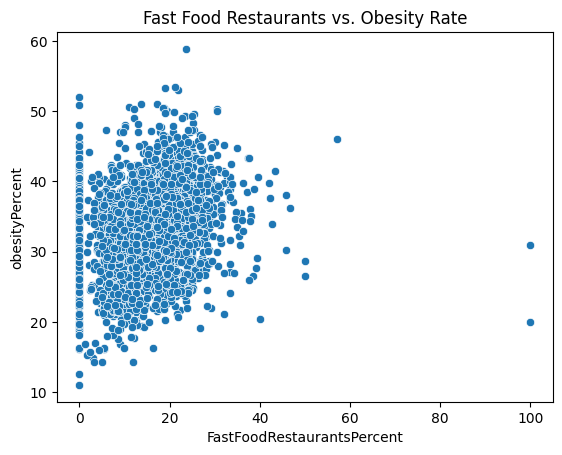

In [11]:
df = pd.read_csv("us_food.csv")
df_clean = df.dropna(subset=["FastFoodRestaurantsPercent", "obesityPercent"])
correlation = df_clean["FastFoodRestaurantsPercent"].corr(df_clean["obesityPercent"])
print(f"Correlation between Fast Food % and Obesity: {correlation:.2f}")

# Plot
sns.scatterplot(data=df_clean, x="FastFoodRestaurantsPercent", y="obesityPercent")
plt.title("Fast Food Restaurants vs. Obesity Rate")
plt.show()

## 6. Build a regression model using multiple variables. Think carefully about the control variables you use. 

In [ ]:
import statsmodels.api as sm
# in case, dropna again
df_clean = df.dropna(subset=[
    "FastFoodRestaurantsPercent", 
    "medianHouseholdIncome", 
    "educationLessThanHighSchoolPercent", 
    "urbanRuralStatus", 
    "obesityPercent"
])

main_predictor = "FastFoodRestaurantsPercent"

# Covariates to adjust for
adjusting_variables = [
    "medianHouseholdIncome", 
    "educationLessThanHighSchoolPercent", 
    "urbanRuralStatus"
]

X_clean = df_clean[[main_predictor] + adjusting_variables]
X_clean = sm.add_constant(X_clean)
y_clean = df_clean["obesityPercent"]

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())


# Check for Multicolinearity
# VIF = 1 → No multicollinearity
# VIF between 1–5 → Moderate (ok)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_clean.columns
vif_data["VIF"] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]

print(vif_data)

                            OLS Regression Results                            
Dep. Variable:         obesityPercent   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     200.2
Date:                Fri, 09 May 2025   Prob (F-statistic):          7.48e-153
Time:                        21:12:20   Log-Likelihood:                -9541.7
No. Observations:                3101   AIC:                         1.909e+04
Df Residuals:                    3096   BIC:                         1.912e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## 7. Display the results of the regression using stargazer. 

In [13]:
# Your code goes here.
from IPython.display import HTML
stargazer = Stargazer([model])
html_output = stargazer.render_html()
display(HTML(html_output))

In [14]:
# Using robust standard errors to fix:
model_robust = model.get_robustcov_results(cov_type='HC3')
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:         obesityPercent   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     184.3
Date:                Fri, 09 May 2025   Prob (F-statistic):          7.27e-142
Time:                        21:12:20   Log-Likelihood:                -9541.7
No. Observations:                3101   AIC:                         1.909e+04
Df Residuals:                    3096   BIC:                         1.912e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## 8. Explain whether you find for or against the hypothesis (or find for the null).

Your explanation goes here. 

Conclusion: Reject the Null Hypothesis

FastFoodRestaurantsPercent:
    Coefficient: 0.1204
    p-value: 0.000 (very significant)
    Interpretation: For each 1% increase in fast food restaurants, the obesity rate increases by approximately 0.12 percentage points, controlling for the other variables.

Variable	                      Coefficient	  p-value	                Interpretation
medianHouseholdIncome	           -0.0002	       0.000	       Higher income is significantly associated with LOWER obesity.
educationLessThanHighSchoolPercent	0.0408	       0.028	       Less education is associated with slightly HIGHER obesity.
urbanRuralStatus	               -0.3250         0.024           If coded 1 = rural, obesity is slightly LOWER in rural areas (unexpected).

R-squared = 0.205: About 20.5% of the variance in obesity rates is explained by the model.

F-statistic p-value = 7.48e-153: The model as a whole is highly statistically significant.

Condition Number is high (6.26e+05): This suggests potential multicollinearity, especially if variables like income and education are correlated.


However there exist assumptions of homoscedasticity.

Using robust inference is more reliable when there's heteroscedasticity (non-constant error variance in this case).

Conclusion:

Still reject the null:

FastFoodRestaurantsPercent remains strongly significant (p < 0.001).

Education is now only MARGINALLY significant (p ≈ 0.053).

The model still shows a NEGATIVE effect of income and a slight rural advantage in obesity.

R² is the proportion of variance in the dependent variable (Y) that can be explained by the independent variables (X) in your regression model.
R² = 1 − (SSR / SST)

t = estimated coefficient / standard error


OLS Assumes:
Errors (residuals) are homoscedastic (have equal variance across all observations), and
Errors are uncorrelated (no autocorrelation).